In [ ]:
# #Mounting the google drive
# from google.colab import drive
# drive.mount('/content/drive')
# Path='drive/My Drive'

from google.colab import files

In [ ]:
uploaded = files.upload()
#Import all libraried
import pandas as pd
import matplotlib as plt
import seaborn as snb
import numpy as np
%matplotlib inline

Saving Septic_Patients.csv to Septic_Patients.csv


In [ ]:
#Read the data
df=pd.read_csv('Septic_Patients.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,235,0,0,77.0,100.0,NaN,NaN,26.5,NaN,21.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.28,1,NaN,NaN,-0.02,3,0,11093,SepsisAfterAdm
1,236,1,1,71.5,97.5,NaN,97.0,83.5,68.0,16.50,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,33.0,60.0,8.3,107.0,0.9,NaN,158.0,NaN,2.0,3.7,4.8,0.9,NaN,42.2,15.6,NaN,17.7,NaN,158.0,59.28,1,NaN,NaN,-0.02,4,0,11093,SepsisAfterAdm
2,237,2,2,79.0,100.0,NaN,106.0,87.0,72.0,20.75,NaN,-3.0,22.0,1.0,7.29,48.0,NaN,NaN,33.0,60.0,NaN,107.0,NaN,NaN,NaN,1.7,2.0,NaN,4.8,NaN,NaN,42.2,15.6,NaN,17.7,NaN,NaN,59.28,1,NaN,NaN,-0.02,5,0,11093,SepsisAfterAdm
3,238,3,3,61.0,100.0,NaN,151.0,95.0,90.0,16.00,NaN,-3.0,NaN,0.6,7.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.28,1,NaN,NaN,-0.02,6,0,11093,SepsisAfterAdm
4,239,4,4,49.0,100.0,NaN,145.0,92.0,84.0,20.00,NaN,-1.0,NaN,0.6,7.49,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.28,1,NaN,NaN,-0.02,7,0,11093,SepsisAfterAdm


In [ ]:
#This returns the unique patient id to the array
PIdArray=df['Patient_ID'].unique()
#This is to access patient id at location 1
PIdArray[0]


11093

In [ ]:
#Defining a output dataframe and appending all the interpolated values
df_output=pd.DataFrame()
for i in PIdArray:
    df_new=df[df['Patient_ID']==i].interpolate(limit_direction='both')
    df_output=df_output.append(df_new)

In [ ]:
df_output.isnull().sum()

Unnamed: 0               0
Unnamed: 0.1             0
Hour                     0
HR                       0
O2Sat                   24
Temp                   785
SBP                   3480
MAP                      0
DBP                  17495
Resp                   497
EtCO2               134045
BaseExcess           67325
HCO3                 62739
FiO2                 24645
pH                   23026
PaCO2                23826
SaO2                 63600
AST                  60546
BUN                   2009
Alkalinephos         61019
Calcium               3803
Chloride             52820
Creatinine            2060
Bilirubin_direct    144898
Glucose               1268
Lactate              45797
Magnesium             3699
Phosphate            12899
Potassium             1572
Bilirubin_total      60792
TroponinI           141165
Hct                   2163
Hgb                   2424
PTT                  42354
WBC                   2662
Fibrinogen          125159
Platelets             2648
A

In [ ]:
dfNull =pd.DataFrame()
for i in PIdArray:
   
    df_new=df_output[df_output['Patient_ID']==i].isnull().sum()
    dfNull=dfNull.append(df_new,ignore_index=True)
  
#insert the patient id in the first column
dfNull.insert(0,'PID',PIdArray)
dfNull=dfNull.astype(int)

In [ ]:
#Number of patients for which we are having null values for a particular measure
missingData=pd.DataFrame()
missingData=(dfNull!= 0).sum()

In [ ]:
missingData=missingData.drop('PID')

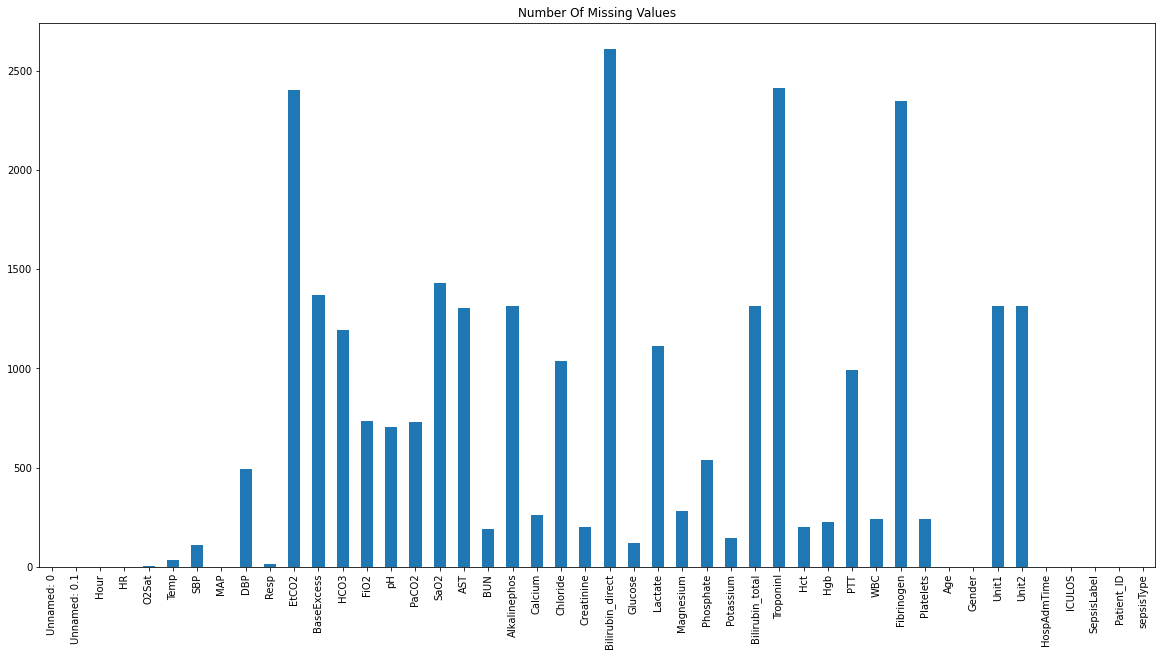

In [ ]:
missingData.plot(kind='bar',figsize=(20, 10), title='Number Of Missing Values')

In [ ]:
df_new=df[["Hour","BaseExcess","Alkalinephos","Lactate","Age","Gender","SepsisLabel","Patient_ID"]]
df_features=df_new[["Hour","BaseExcess","Alkalinephos","Lactate","Patient_ID"]]

fancyimpute is a library for missing data imputation algorithms. Fancyimpute use machine learning algorithm to impute missing values
Missing data can be imputed using FancyImpute 2 ways----1.KNN    2.MICE--multiple imputation by chained equation
1.KNN finds out the similar data points among all the features. Then it took the average of all the points to fill in the missing values.
2.MICE perform multiple regression over the sample data and take averages of them


In [ ]:
!pip install fancyimpute
from fancyimpute import KNN,SoftImpute,IterativeImputer


     |████████████████████████████████| 154 kB 43.7 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=68d82e02236d24d9764024541e3a9119dfac645ff62168eebe3e613080e14cea
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=5171055114a750b33be64b3e1d70043324f104a117137a6311d3014102e5e69f
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:

df_filled = pd.DataFrame(data = IterativeImputer().fit_transform(df_features[df_features.columns.to_numpy()]),
                         columns = df_features.columns,index = df_features.index
        )


pd.set_option('display.expand_frame_repr', False)
df_filled['SepsisLabel'] = df_new['SepsisLabel']

In [ ]:
df_filled_latest=df_filled[['BaseExcess','Alkalinephos','Lactate']]

In [ ]:
df_filled_latest.corr()

,BaseExcess,Alkalinephos,Lactate
BaseExcess,1.000000,0.326281,-0.798377
Alkalinephos,0.326281,1.000000,-0.336719
Lactate,-0.798377,-0.336719,1.000000


In [ ]:
df_filled.isnull().sum()

Hour            0
BaseExcess      0
Alkalinephos    0
Lactate         0
Patient_ID      0
SepsisLabel     0
dtype: int64

Text(0.5, 1.0, 'Lactate')

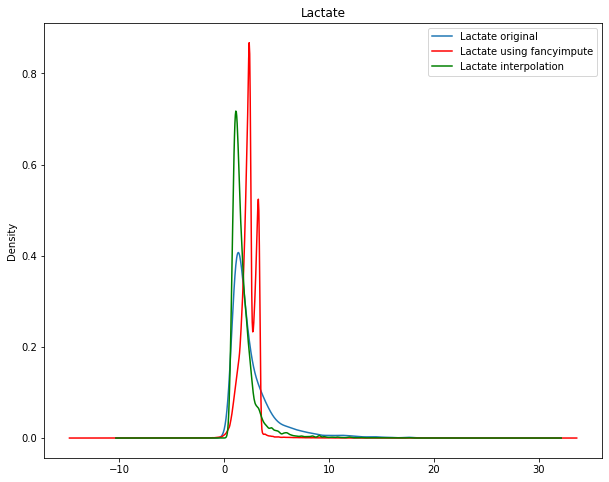

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

df_new['Lactate'].plot(kind='kde', ax=ax)

df_filled['Lactate'].plot(kind='kde', ax=ax, color='red')
df_output['Lactate'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
labels = ['Lactate original', 'Lactate using fancyimpute','Lactate interpolation']
ax.legend(lines, labels, loc='best')
plt.title('Lactate')

Text(0.5, 1.0, 'BaseExcess')

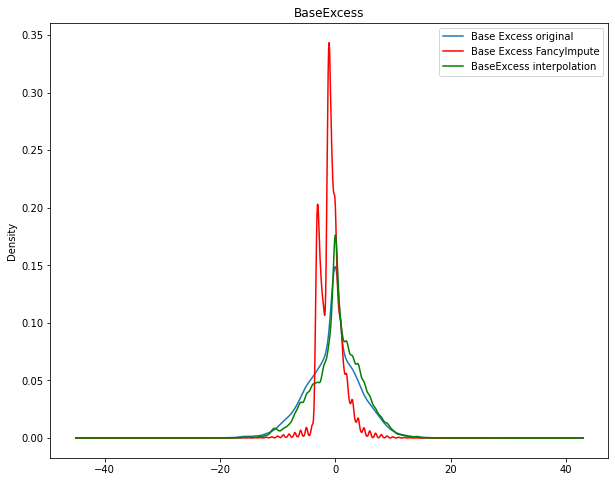

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

df_new['BaseExcess'].plot(kind='kde', ax=ax)

df_filled['BaseExcess'].plot(kind='kde', ax=ax, color='red')
df_output['BaseExcess'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Base Excess original', 'Base Excess FancyImpute','BaseExcess interpolation']
ax.legend(lines, labels, loc='best')
# add figure title
plt.title('BaseExcess')
  

Text(0.5, 1.0, 'Alkalinephos')

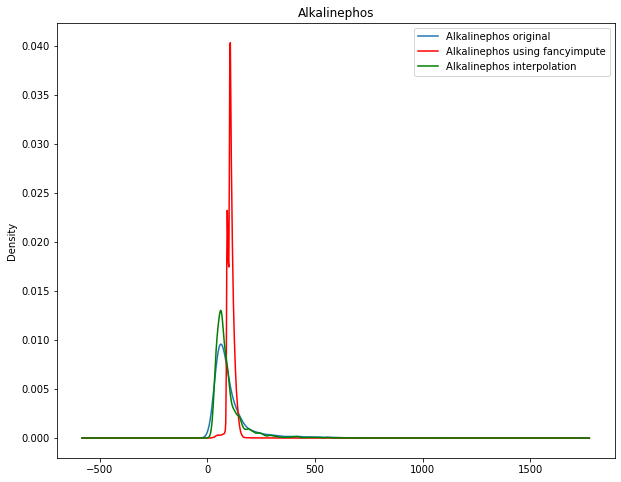

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

df_new['Alkalinephos'].plot(kind='kde', ax=ax)

df_filled['Alkalinephos'].plot(kind='kde', ax=ax, color='red')
df_output['Alkalinephos'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
labels = ['Alkalinephos original', 'Alkalinephos using fancyimpute','Alkalinephos interpolation']
ax.legend(lines, labels, loc='best')
plt.title('Alkalinephos')

In [ ]:
dff=df.copy()
dff.drop(['sepsisType','EtCO2','Bilirubin_direct','TroponinI','Fibrinogen','HospAdmTime','Unit1','Unit2','Unnamed: 0','Unnamed: 0.1','ICULOS'], axis = 1, inplace = True, errors = 'ignore')
dff_filled_all= pd.DataFrame(data = IterativeImputer().fit_transform(dff[dff.columns.to_numpy()]),
                         columns = dff.columns,index = dff.index
        )


pd.set_option('display.expand_frame_repr', False)
dff_filled_all['SepsisLabel'] = df['SepsisLabel']





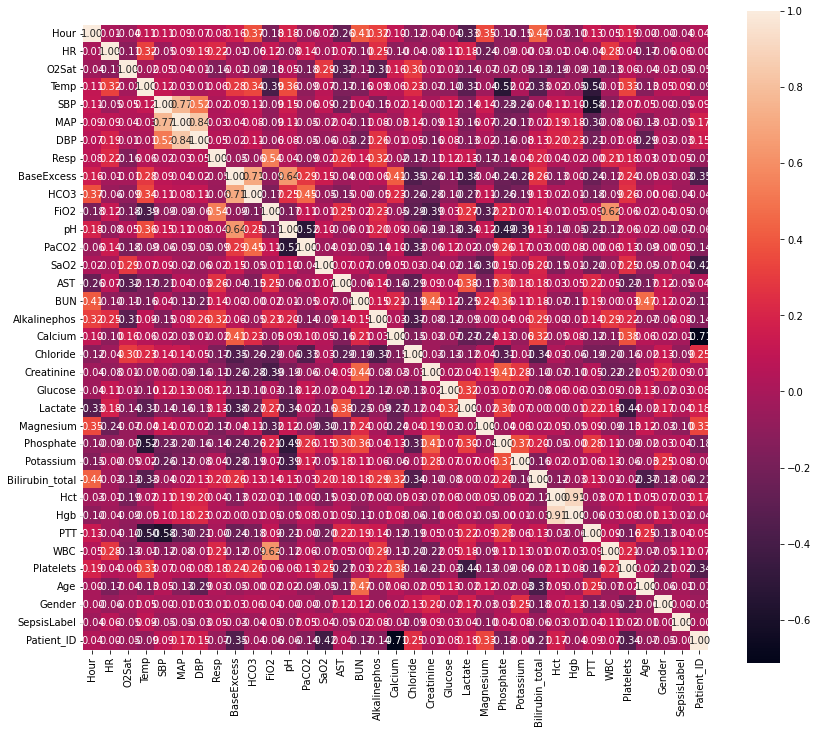

In [ ]:
corr=dff_filled_all.corr()
plt.figure(figsize=(14,12))
ax=sns.heatmap(corr,square=True,annot=True,fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

corr_lead = dff_filled_all.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2', 'Correlation']
# corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

In [ ]:
# Top 10 Positive correlated variables
corr_df.head(10)

,VAR1,VAR2,Correlation
971,Hgb,Hct,0.910419
215,DBP,MAP,0.837729
179,MAP,SBP,0.769968
323,HCO3,BaseExcess,0.708775
393,pH,BaseExcess,0.636220
1025,WBC,FiO2,0.621560
357,FiO2,Resp,0.537502
214,DBP,SBP,0.524186
1100,Age,BUN,0.465621
429,PaCO2,HCO3,0.453474


Text(0.5, 1.0, 'Heart Rate')

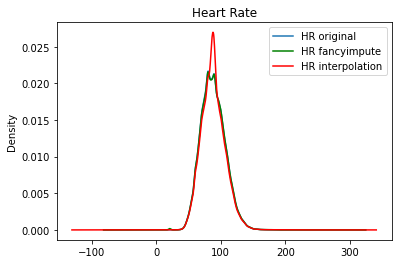

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['HR'].plot(kind='kde', ax=ax)
df_output['HR'].plot(kind='kde',ax=ax,color='green')
dff_filled_all['HR'].plot(kind='kde', ax=ax, color='red')
# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['HR original', 'HR fancyimpute','HR interpolation']
ax.legend(lines, labels, loc='best')
# add figure title
plt.title('Heart Rate')

In [ ]:
dff_knn=df.copy()
dff_knn.drop(['sepsisType','EtCO2','Bilirubin_direct','TroponinI','Fibrinogen','HospAdmTime','Unit1','Unit2'], axis = 1, inplace = True, errors = 'ignore')
dff_filled_knn= pd.DataFrame(data = KNN().fit_transform(dff_knn[dff_knn.columns.to_numpy()]),
                         columns = dff_knn.columns,index = dff_knn.index)